# Winding Creation and Analysis

This document describes methods to create windings either from BCH/BATCH files or from scratch.

In [1]:
import femagtools.bch
import femagtools.plot
import femagtools.windings

Load a BATCH file and create the winding:

In [2]:
bch = femagtools.bch.read('PM_270_L8_001.BATCH')
w = femagtools.windings.Windings(bch)

Plot the magnetomotive force

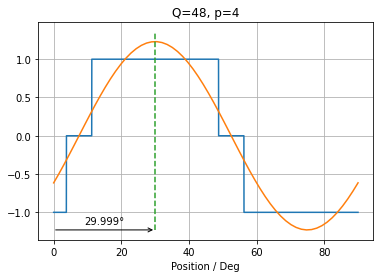

In [3]:
f=w.mmf()
title = f"Q={w.Q}, p={w.p}"
femagtools.plot.mmf(f, title)

Plot the MMF harmonics

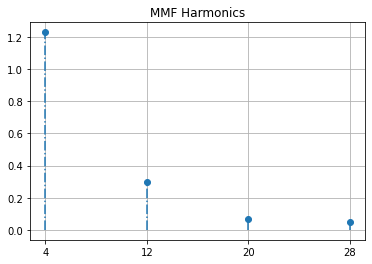

In [4]:
femagtools.plot.mmf_fft(f)

Show the winding properties:

In [5]:
w.windings

{1: {'dir': [1, 1],
  'N': [9.0, 9.0],
  'R': [0.0994546, 0.0994546],
  'PHI': [3.75, 11.25]},
 2: {'dir': [1, 1],
  'N': [9.0, 9.0],
  'R': [0.0994546, 0.0994546],
  'PHI': [33.75, 41.25]},
 3: {'dir': [-1, -1],
  'N': [9.0, 9.0],
  'R': [0.0994546, 0.0994546],
  'PHI': [18.75, 26.25]}}

Show the slots of phase 3:

In [6]:
w.slots(3)

array([[ 3,  4,  9, 10],
       [15, 16, 21, 22],
       [27, 28, 33, 34],
       [39, 40, 45, 46]])

Show the slots and the winding directions of all phases:

In [7]:
w.zoneplan()

([[1, 2], [5, 6], [-3, -4]], [])

Plot the zone plan:

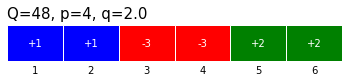

In [8]:
femagtools.plot.zoneplan(w)

Create a single layer 3-phase winding with 12 slots, 2 pole pairs from scratch:

In [9]:
w1 = femagtools.windings.Windings({'Q':12, 'p':2, 'm':3})

Show the winding properties and note the default radius and winding turns values:

In [10]:
w1.windings

{1: {'dir': [1, -1], 'N': [1, 1], 'R': [1, 1], 'PHI': [15.0, 105.0]},
 2: {'dir': [1, -1], 'N': [1, 1], 'R': [1, 1], 'PHI': [75.0, 165.0]},
 3: {'dir': [-1, 1], 'N': [1, 1], 'R': [1, 1], 'PHI': [45.0, 135.0]}}

In [11]:
w1.slots(3)

array([[ 2,  5],
       [ 8, 11]])

Plot the magnetomotive force:

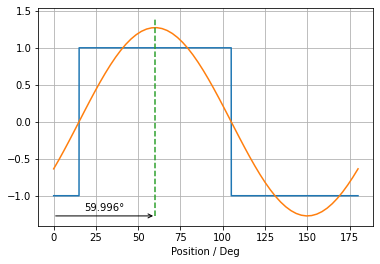

In [12]:
femagtools.plot.mmf(w1.mmf(), '')

Show the zoneplan:

In [13]:
w1.zoneplan()

([[1, -4], [3, -6], [-2, 5]], [])

This is a  2-layer, 3-phase winding with 90 slots and 12 pole pairs:

In [14]:
w2 = femagtools.windings.Windings({'Q':90, 'p':12, 'm':3, 'l':2})

In [15]:
w2.windings

{1: {'dir': [1, 1, 1, -1, -1, -1, 1, 1, -1, -1],
  'N': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'R': [1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
  'PHI': [2.0, 2.0, 6.0, 14.0, 18.0, 18.0, 30.0, 34.0, 46.0, 50.0]},
 2: {'dir': [1, 1, -1, -1, 1, 1, 1, -1, -1, -1],
  'N': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'R': [0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
  'PHI': [10.0, 14.0, 26.0, 30.0, 42.0, 42.0, 46.0, 54.0, 58.0, 58.0]},
 3: {'dir': [-1, -1, 1, 1, 1, -1, -1, -1, 1, 1],
  'N': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'R': [0, 1, 1, 0, 1, 0, 1, 0, 0, 1],
  'PHI': [6.0, 10.0, 22.0, 22.0, 26.0, 34.0, 38.0, 38.0, 50.0, 54.0]}}

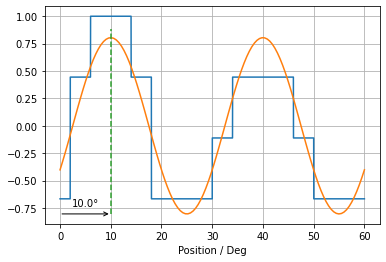

In [16]:
femagtools.plot.mmf(w2.mmf())

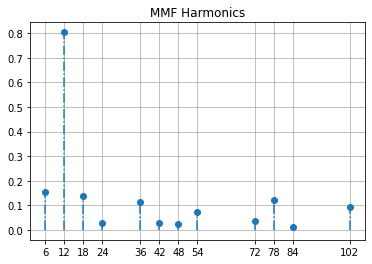

In [17]:
femagtools.plot.mmf_fft(w2.mmf())

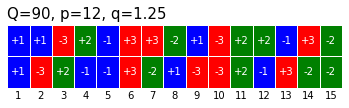

In [18]:
femagtools.plot.zoneplan(w2)

In [19]:
w2.zoneplan()

([[1, 2, -5, 9, -13], [4, -8, 11, 12, -15], [-3, 6, 7, -10, 14]],
 [[1, -4, -5, 8, -12], [3, -7, 11, -14, -15], [-2, 6, -9, -10, 13]])

In [20]:
w2.slots(1)

array([[ 1,  1,  2,  4,  5,  5,  8,  9, 12, 13],
       [16, 16, 17, 19, 20, 20, 23, 24, 27, 28],
       [31, 31, 32, 34, 35, 35, 38, 39, 42, 43],
       [46, 46, 47, 49, 50, 50, 53, 54, 57, 58],
       [61, 61, 62, 64, 65, 65, 68, 69, 72, 73],
       [76, 76, 77, 79, 80, 80, 83, 84, 87, 88]])

A 2-layer winding with coil width:

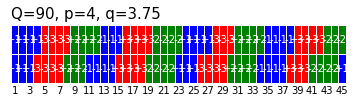

In [21]:
w3 = femagtools.windings.Windings({'Q':90, 'p':4, 'm':3, 'l':2, 'coilwidth':10})
femagtools.plot.zoneplan(w3)

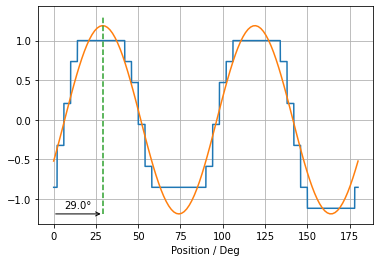

In [22]:
femagtools.plot.mmf(w3.mmf())

This is an example with 168 slots from a BATCH file:

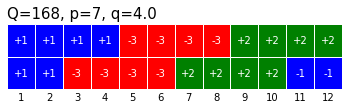

In [23]:
bch = femagtools.bch.read('xxx.BCH')
w4 = femagtools.windings.Windings(bch)
femagtools.plot.zoneplan(w4)

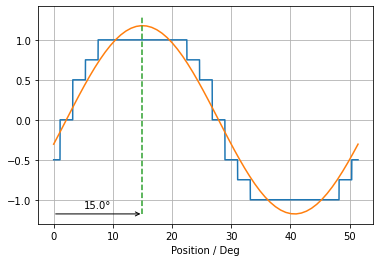

In [24]:
femagtools.plot.mmf(w4.mmf())

The same example created directly:

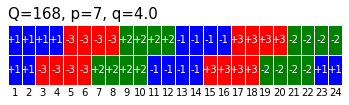

In [25]:
w5 = femagtools.windings.Windings(dict(Q=168, p=7, m=3, l=2, coilwidth=10))
femagtools.plot.zoneplan(w5)

Here is another example:

In [26]:
bch = femagtools.bch.read('PM_130_L10.BATCH')
w6 = femagtools.windings.Windings(bch)

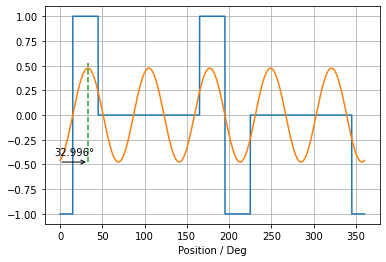

In [27]:
f = w6.mmf()
femagtools.plot.mmf(f)

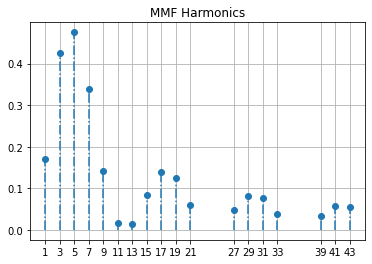

In [28]:
femagtools.plot.mmf_fft(f)

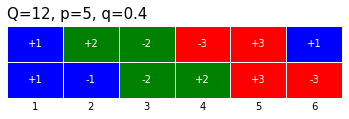

In [29]:
femagtools.plot.zoneplan(w6)